In [6]:
from fit_model import *

In [7]:
from time import time

In [33]:
def define_model_1(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    # ES NECESARIO, para que asi pueda devolver la dimesión de 8
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model
    
def define_model_1_var(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(GRU(n_units,input_shape=(src_timesteps,1)))
    model.add(RepeatVector(tar_timesteps)) 
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

# Encoder-Decoder
def define_model_4(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    # Encoder
    model.add(GRU(n_units, input_shape=(src_timesteps,1), go_backwards=True ))
    model.add(RepeatVector(tar_timesteps))
    # Decoder
    model.add(GRU(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(TimeDistributed(Dense(n_units, activation='relu')))
    model.add(Dropout(0.5))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [12]:
folderImg_name = "img_caro/cm_model_"
folderModels_name = "models_caro/cm_model_"
folderHistories_name = "histories_caro/cm_history_"

ds_filename, train_ds_fn, test_ds_fn = 'dataset/english-spanish-both-10000.txt', \
                                       'dataset/english-spanish-train-10000.txt', \
                                       'dataset/english-spanish-test-10000.txt'
epochs= 30

In [10]:
def extract_histories(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['loss'])
        history_models_testLoss.append(history['val_loss'])
    
def graph_historyModels(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'b-')
    plt.plot(epoch_count, history[2], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )
    print(f"{nameModels[2]} = {round(min(history[2]),4)}" )

# Pruebas Modelo 1

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_10 (GRU)                (None, 512)               791040    
                                                                 
 repeat_vector_10 (RepeatVec  (None, 8, 512)           0         
 tor)                                                            
                                                                 
 time_distributed_11 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      
                                                                 
Total params: 3,104,670
Trainable params: 3,104,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100

Epoch 1: val_loss improved from inf to 3.03229, saving model to models_caro\cm_model_1_10_final.h5
125/1


Epoch 38: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6710 - acc: 0.6405 - val_loss: 2.8100 - val_acc: 0.6415 - 22s/epoch - 179ms/step
Epoch 39/100

Epoch 39: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6629 - acc: 0.6405 - val_loss: 2.8128 - val_acc: 0.6407 - 22s/epoch - 178ms/step
Epoch 40/100

Epoch 40: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6517 - acc: 0.6405 - val_loss: 2.8186 - val_acc: 0.6398 - 22s/epoch - 177ms/step
Epoch 41/100

Epoch 41: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6447 - acc: 0.6400 - val_loss: 2.8280 - val_acc: 0.6383 - 22s/epoch - 177ms/step
Epoch 42/100

Epoch 42: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6374 - acc: 0.6400 - val_loss: 2.8345 - val_acc: 0.6395 - 22s/epoch - 178ms/step
Epoch 43/100

Epoch 43: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.6315 - acc: 0.6403 - val_loss: 2.8330 - val_acc: 0.6402 - 22s/epoch - 177ms/step
Epoch 44/10

125/125 - 22s - loss: 1.4723 - acc: 0.6397 - val_loss: 2.9825 - val_acc: 0.6365 - 22s/epoch - 177ms/step
Epoch 88/100

Epoch 88: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.4755 - acc: 0.6392 - val_loss: 2.9871 - val_acc: 0.6367 - 22s/epoch - 177ms/step
Epoch 89/100

Epoch 89: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.4747 - acc: 0.6390 - val_loss: 2.9994 - val_acc: 0.6361 - 22s/epoch - 177ms/step
Epoch 90/100

Epoch 90: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.4748 - acc: 0.6393 - val_loss: 2.9920 - val_acc: 0.6386 - 22s/epoch - 177ms/step
Epoch 91/100

Epoch 91: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.4638 - acc: 0.6395 - val_loss: 2.9967 - val_acc: 0.6348 - 22s/epoch - 177ms/step
Epoch 92/100

Epoch 92: val_loss did not improve from 2.76130
125/125 - 22s - loss: 1.4699 - acc: 0.6394 - val_loss: 3.0004 - val_acc: 0.6350 - 22s/epoch - 177ms/step
Epoch 93/100

Epoch 93: val_loss did not improve from 2.7613

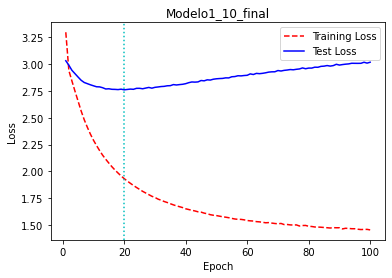

In [17]:
epochs= 100
units = 512
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_10_final'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_11 (GRU)                (None, 512)               791040    
                                                                 
 repeat_vector_11 (RepeatVec  (None, 8, 512)           0         
 tor)                                                            
                                                                 
 time_distributed_12 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      
                                                                 
Total params: 3,104,670
Trainable params: 3,104,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.03671, saving model to models_caro\cm_model_1_10.h5
125/125 - 25

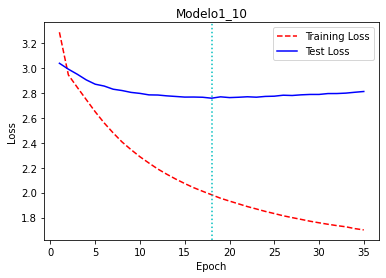

In [18]:
epochs= 35
units = 512
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 64
id_variation = '1_10'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)

graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

# Pruebas Modelo 1 var

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_12 (GRU)                (None, 512)               791040    
                                                                 
 repeat_vector_12 (RepeatVec  (None, 8, 512)           0         
 tor)                                                            
                                                                 
 time_distributed_13 (TimeDi  (None, 8, 512)           262656    
 stributed)                                                      
                                                                 
 dropout_4 (Dropout)         (None, 8, 512)            0         
                                                                 
 time_distributed_14 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      


time elapsed: 1071.966855764389


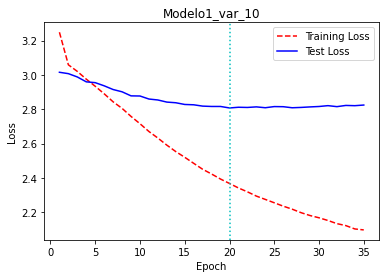

In [19]:
units = 512
learning_rate = 0.001
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '1_var_10'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1_var(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

# Pruebas de Modelo 4

2272 4510 5 8
(8000, 5) (8000, 8) (2000, 5) (2000, 8)
Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_13 (GRU)                (None, 256)               198912    
                                                                 
 repeat_vector_13 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 gru_14 (GRU)                (None, 256)               394752    
                                                                 
 repeat_vector_14 (RepeatVec  (None, 8, 256)           0         
 tor)                                                            
                                                                 
 time_distributed_15 (TimeDi  (None, 8, 256)           65792     
 stributed)                                                      

Epoch 34/35

Epoch 34: val_loss did not improve from 2.83465
250/250 - 22s - loss: 2.4093 - acc: 0.6410 - val_loss: 2.8373 - val_acc: 0.6417 - 22s/epoch - 87ms/step
Epoch 35/35

Epoch 35: val_loss improved from 2.83465 to 2.83051, saving model to models_caro\cm_model_4_10.h5
250/250 - 22s - loss: 2.3946 - acc: 0.6410 - val_loss: 2.8305 - val_acc: 0.6417 - 22s/epoch - 87ms/step
time elapsed: 762.6670587062836


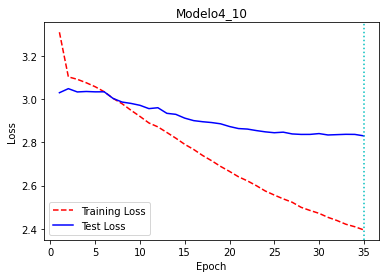

In [20]:
units = 256
learning_rate = 0.001 
loss_func='sparse_categorical_crossentropy'
batch_size= 32
id_variation = '4_10'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'

dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=False)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=False)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_4(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

# Modelo <>   con one-hot

2272 4510 5 8
(8000, 5) (8000, 8, 4510) (2000, 5) (2000, 8, 4510)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_15 (GRU)                (None, 512)               791040    
                                                                 
 repeat_vector_15 (RepeatVec  (None, 8, 512)           0         
 tor)                                                            
                                                                 
 time_distributed_17 (TimeDi  (None, 8, 4510)          2313630   
 stributed)                                                      
                                                                 
Total params: 3,104,670
Trainable params: 3,104,670
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/35

Epoch 1: val_loss improved from inf to 3.03652, saving model to models_caro\cm_model_4_11_on

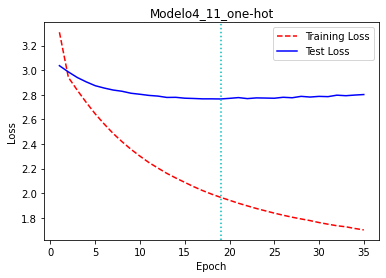

In [21]:
units = 512
learning_rate = 0.001
loss_func='categorical_crossentropy'
batch_size= 64
id_variation = '4_11_one-hot'
model_save_file_name= folderModels_name +id_variation+'.h5'
history_save_file_name= folderHistories_name +id_variation+'.npy'


dataset,train,test=load_data(ds_filename, train_ds_fn, test_ds_fn)

eng_tokenizer,eng_vocab_size,eng_max_sentence_length = prepare_tokenizer(dataset,0)
spa_tokenizer,spa_vocab_size,spa_max_sentence_length = prepare_tokenizer(dataset,1)
print(eng_vocab_size,spa_vocab_size,eng_max_sentence_length,spa_max_sentence_length)

# HERE defines ONE HOT processing
# preprocess_input(origin_tok, origin_max_sent_length, target_tok, target_max_sent_length,target_vocab_size, data, one_hot=False):
trainX, trainY =  preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, train, one_hot=True)
testX, testY = preprocess_input(eng_tokenizer, eng_max_sentence_length, spa_tokenizer, spa_max_sentence_length,spa_vocab_size, test, one_hot=True)
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

model = define_model_1(eng_vocab_size, spa_vocab_size, eng_max_sentence_length, spa_max_sentence_length, units)
create_model(model,loss_func,learning_rate)

initime = time()
train_evaluate_model(trainX, trainY, testX,testY, epochs, batch_size, model, model_save_file_name, history_save_file_name)
print( f"time elapsed: {time()-initime}")
graph_loss_vs_epochs(model.history, folderImg_name+id_variation+'.png', 'Modelo'+id_variation)

# Comparation between one-hot and non-one-hot

In [67]:
def graph_historyModels_2(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], 'r-')
    plt.plot(epoch_count, history[1], 'g-')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )

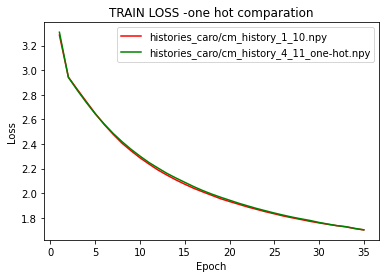

histories_caro/cm_history_1_10.npy = 1.7014
histories_caro/cm_history_4_11_one-hot.npy = 1.7022


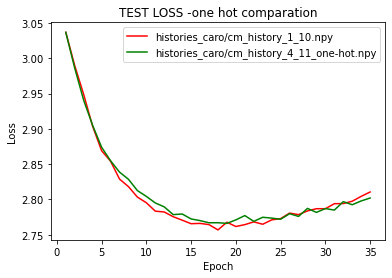

histories_caro/cm_history_1_10.npy = 2.7569
histories_caro/cm_history_4_11_one-hot.npy = 2.7662


In [68]:
epochs= 35
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name # histories_caro/cm_spa-eng_history_

vec_ids = ["1_10",'4_11_one-hot']
number_round = "one hot comparation"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy']
vector_names_legends = ['Model_'+vec_ids[0], 'Model_'+vec_ids[1]]

extract_histories(2, vector_namesHistory)

graph_historyModels_2(history_models_trainLoss,"TRAIN LOSS -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels_2(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

# Graficas finales

In [1]:
def extract_histories_2(quantity, vector_namesHistory):
    for i in range(1,quantity+1):
        history = load_history(vector_namesHistory[i-1])
        history_models_trainLoss.append(history['val_acc'])
        history_models_testLoss.append(history['val_loss'])

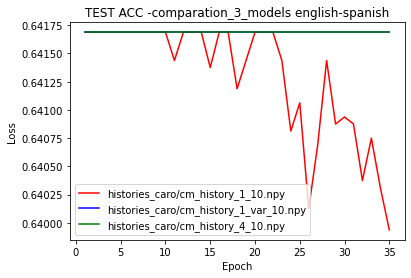

histories_caro/cm_history_1_10.npy = 0.6399
histories_caro/cm_history_1_var_10.npy = 0.6417
histories_caro/cm_history_4_10.npy = 0.6417


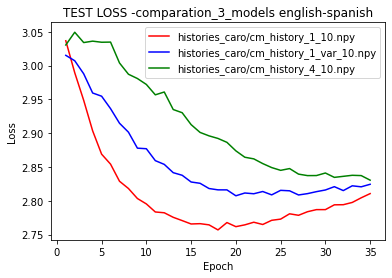

histories_caro/cm_history_1_10.npy = 2.7569
histories_caro/cm_history_1_var_10.npy = 2.8074
histories_caro/cm_history_4_10.npy = 2.8305


In [72]:
# Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name # histories_caro/cm_spa-eng_history_

vec_ids = ["1_10",'1_var_10','4_10']
number_round = "comparation_3_models english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy']
vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

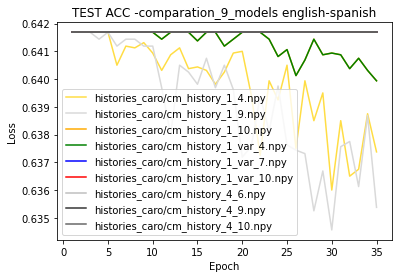

histories_caro/cm_history_1_4.npy = 0.636
histories_caro/cm_history_1_9.npy = 0.6346
histories_caro/cm_history_1_10.npy = 0.6399
histories_caro/cm_history_1_var_4.npy = 0.6417
histories_caro/cm_history_1_var_7.npy = 0.6417
histories_caro/cm_history_1_var_10.npy = 0.6417
histories_caro/cm_history_4_6.npy = 0.6417
histories_caro/cm_history_4_9.npy = 0.6417
histories_caro/cm_history_4_10.npy = 0.6417


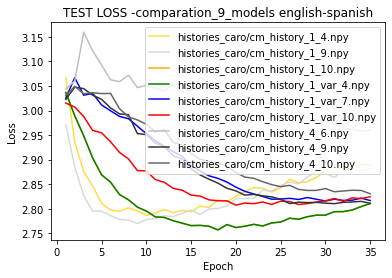

histories_caro/cm_history_1_4.npy = 2.7866
histories_caro/cm_history_1_9.npy = 2.7701
histories_caro/cm_history_1_10.npy = 2.7569
histories_caro/cm_history_1_var_4.npy = 2.8267
histories_caro/cm_history_1_var_7.npy = 2.8157
histories_caro/cm_history_1_var_10.npy = 2.8074
histories_caro/cm_history_4_6.npy = 2.9581
histories_caro/cm_history_4_9.npy = 2.8104
histories_caro/cm_history_4_10.npy = 2.8305


In [86]:
def graph_historyModels_3(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], color='#FFDD44')
    plt.plot(epoch_count, history[1], color='0.85')
    plt.plot(epoch_count, history[2], color='#FFAA00')
    plt.plot(epoch_count, history[2], color='g')
    plt.plot(epoch_count, history[4], color='b')
    plt.plot(epoch_count, history[5], color='r')
    plt.plot(epoch_count, history[6], color='0.75')
    plt.plot(epoch_count, history[7], color='0.2')
    plt.plot(epoch_count, history[8], color='0.4')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )
    print(f"{nameModels[2]} = {round(min(history[2]),4) }" )
    print(f"{nameModels[3]} = {round(min(history[3]),4)}" )
    print(f"{nameModels[4]} = {round(min(history[4]),4) }" )
    print(f"{nameModels[5]} = {round(min(history[5]),4)}" )
    print(f"{nameModels[6]} = {round(min(history[6]),4) }" )
    print(f"{nameModels[7]} = {round(min(history[7]),4)}" )
    print(f"{nameModels[8]} = {round(min(history[8]),4)}" )
    

    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

flder = folderHistories_name # histories_caro/cm_history_

vec_ids = ["1_4",'1_9','1_10','1_var_4','1_var_7','1_var_10','4_6','4_9','4_10']
number_round = "comparation_9_models english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy',flder+vec_ids[3]+'.npy',flder+vec_ids[4]+'.npy',flder+vec_ids[5]+'.npy', flder+vec_ids[6]+'.npy',flder+vec_ids[7]+'.npy',flder+vec_ids[8]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2],'Model_'+vec_ids[3],'Model_'+vec_ids[4],'Model_'+vec_ids[5],'Model_'+vec_ids[6],'Model_'+vec_ids[7],'Model_'+vec_ids[8]]

extract_histories_2(9, vector_namesHistory)

graph_historyModels_3(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels_3(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

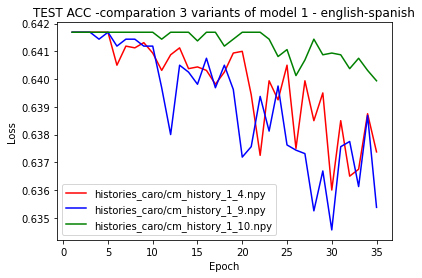

histories_caro/cm_history_1_4.npy = 0.636
histories_caro/cm_history_1_9.npy = 0.6346
histories_caro/cm_history_1_10.npy = 0.6399


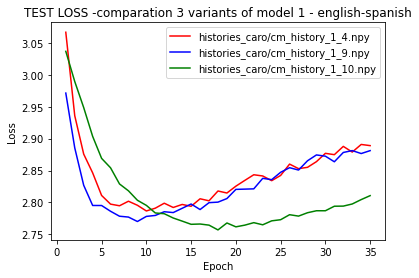

histories_caro/cm_history_1_4.npy = 2.7866
histories_caro/cm_history_1_9.npy = 2.7701
histories_caro/cm_history_1_10.npy = 2.7569


In [15]:
def graph_historyModels_4(history,title, nameModels, save_image_filename):
    # define axis X , Create count of the number of epochs
    epoch_count = range(1,epochs +1)
        
    plt.plot(epoch_count, history[0], color='#FFDD44')
    plt.plot(epoch_count, history[1], color='0.85')
    plt.plot(epoch_count, history[2], color='#FFAA00')
    plt.plot(epoch_count, history[2], color='g')
    plt.plot(epoch_count, history[4], color='b')
    plt.plot(epoch_count, history[5], color='r')
    plt.plot(epoch_count, history[6], color='0.75')
    plt.plot(epoch_count, history[7], color='0.2')
    plt.plot(epoch_count, history[8], color='0.4')
    plt.legend(nameModels)
    plt.title(title)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')

    # Visualize loss history
    plt.savefig(save_image_filename) 
    plt.show() 
    
    # print min values
    print(f"{nameModels[0]} = {round(min(history[0]),4) }" )
    print(f"{nameModels[1]} = {round(min(history[1]),4)}" )
    print(f"{nameModels[2]} = {round(min(history[2]),4) }" )
    print(f"{nameModels[3]} = {round(min(history[3]),4)}" )
    print(f"{nameModels[4]} = {round(min(history[4]),4) }" )
    print(f"{nameModels[5]} = {round(min(history[5]),4)}" )
    print(f"{nameModels[6]} = {round(min(history[6]),4) }" )
    print(f"{nameModels[7]} = {round(min(history[7]),4)}" )
    print(f"{nameModels[8]} = {round(min(history[8]),4)}" )
    
epochs = 35
    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

# flder = folderHistories_name # histories_caro/cm_history_
flder = 'histories_caro/cm_history_'

# vec_ids = ["1_4",'1_9','1_10','1_var_4','1_var_7','1_var_10','4_6','4_9','4_10']
vec_ids = ["1_4",'1_9','1_10']
# cm_history_1_10.npy
number_round = "comparation 3 variants of model 1 - english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

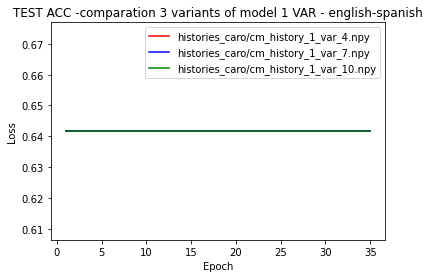

histories_caro/cm_history_1_var_4.npy = 0.6417
histories_caro/cm_history_1_var_7.npy = 0.6417
histories_caro/cm_history_1_var_10.npy = 0.6417


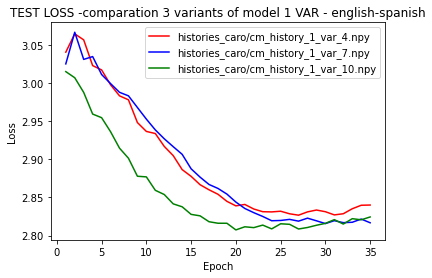

histories_caro/cm_history_1_var_4.npy = 2.8267
histories_caro/cm_history_1_var_7.npy = 2.8157
histories_caro/cm_history_1_var_10.npy = 2.8074


In [18]:
    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

# flder = folderHistories_name # histories_caro/cm_history_
flder = 'histories_caro/cm_history_'

# vec_ids = ["1_4",'1_9','1_10','1_var_4','1_var_7','1_var_10','4_6','4_9','4_10']
vec_ids = ["1_var_4",'1_var_7','1_var_10']
number_round = "comparation 3 variants of model 1 VAR - english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)

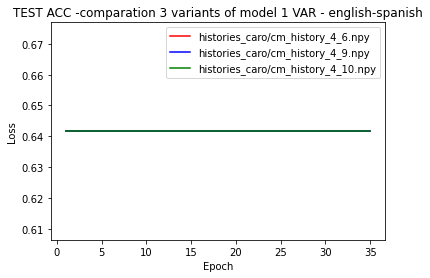

histories_caro/cm_history_4_6.npy = 0.6417
histories_caro/cm_history_4_9.npy = 0.6417
histories_caro/cm_history_4_10.npy = 0.6417


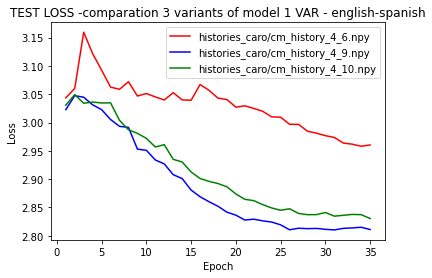

histories_caro/cm_history_4_6.npy = 2.9581
histories_caro/cm_history_4_9.npy = 2.8104
histories_caro/cm_history_4_10.npy = 2.8305


In [19]:
    # Las 3 mejores modelos de cada uno 
history_models_trainLoss = list()
history_models_testLoss = list()

# flder = folderHistories_name # histories_caro/cm_history_
flder = 'histories_caro/cm_history_'

# vec_ids = ["1_4",'1_9','1_10','1_var_4','1_var_7','1_var_10','4_6','4_9','4_10']
vec_ids = ["4_6",'4_9','4_10']
number_round = "comparation 3 variants of model 1 VAR - english-spanish"
vector_namesHistory = [flder+vec_ids[0]+'.npy',flder+vec_ids[1]+'.npy',flder+vec_ids[2]+'.npy'] 

vector_names_legends = ['Model_'+vec_ids[0],'Model_'+vec_ids[1],'Model_'+vec_ids[2]]

extract_histories_2(3, vector_namesHistory)

graph_historyModels(history_models_trainLoss,"TEST ACC -"+number_round, \
                             vector_namesHistory,  \
                             folderImg_name+"trainLoss_"+number_round)

graph_historyModels(history_models_testLoss,"TEST LOSS -"+number_round,  \
                             vector_namesHistory,  \
                             folderImg_name+"testLoss_"+number_round)